In [39]:
import numpy
import os
import pandas

from matplotlib import pyplot
from scipy.signal import windows

PATH = "../results"

def sliding_window(x, kernel_size):
    """
    Computes a sliding window average over the specified data
    
    :param x: A `numpy.ndarray` of the data
    :param kernel_size: An `int` of the size of the sliding window
    
    :returns : A `numpy.ndarray` of the averaged data
    """
    if kernel_size < 2:
        return x
    window = windows.boxcar(kernel_size)
    window = window / window.sum()
    _x = numpy.pad(x, (kernel_size, kernel_size), mode="edge")
    return numpy.convolve(_x, window, mode="same")[kernel_size : -kernel_size]

def plot_score(df, x, y, shade_keys=None, smooth=1):
    """
    Plots the scores from a `pandas.DataFrame` using the provided 
    key
    
    :param df: A `pandas.DataFrame`
    :param key: A `str` of the desired key
    :param shade_keys: A `list` of keys to use as shade
    :param xlabel:
    
    :returns : A `matplotlib.Figure` of the created plot
               A `matplotlib.Axes` of the create plot
    """
    fig, ax = pyplot.subplots(figsize=(3,3))
    ax.plot(df[x], sliding_window(df[y], smooth))
    if isinstance(shade_keys, (tuple, list)):
        ax.fill_between(
            df[x], 
            sliding_window(df[y] - df[shade_keys[0]], smooth), 
            sliding_window(df[y] + df[shade_keys[1]], smooth), 
            alpha=0.3
        )
    elif isinstance(shade_keys, str):
        ax.fill_between(
            df[x], 
            sliding_window(df[y] - df[shade_keys], smooth), 
            sliding_window(df[y] + df[shade_keys], smooth), 
            alpha=0.3
        )
    ax.set(
        xlabel=x, ylabel=y
    )
    return fig, ax

,steps,episodes,elapsed,mean,median,stdev,max,min,average_value,average_entropy,average_value_loss,average_policy_loss,n_updates,explained_variance
0,102,24,104.375928,4.318822,5.555056,1.912699,5.903656,2.162092,0.098458,1.418851,6.420330,-0.028907,63,-1.523570e-04
1,204,49,210.279693,4.272863,5.497085,2.070394,5.786084,1.042070,0.548697,1.416551,5.780074,-0.022537,126,-3.493151e-07
2,300,71,311.340373,4.538822,5.551838,1.689142,5.827098,2.148259,0.692923,1.414015,6.099146,-0.021702,189,2.531185e-07
3,403,99,418.777591,4.317689,5.610948,2.055366,5.793288,1.042070,0.771296,1.411611,5.910337,-0.029960,252,1.121904e-07
4,503,121,527.463102,5.759260,5.813615,0.130027,5.903139,5.616258,0.816696,1.409597,6.292104,-0.022328,315,1.576079e-07


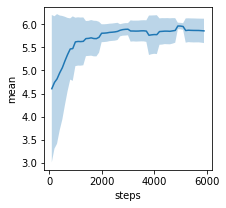

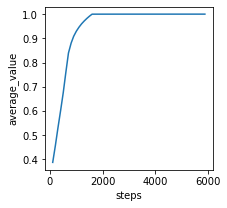

In [53]:
os.makedirs("./panels", exist_ok=True)
model_name = "test.20210706T061320.283760.backup"
model_name = "debug"

df = pandas.read_csv(os.path.join(PATH, model_name, "scores.txt"), sep="\t")
display(df.head())

smoothing_factor = 11
fig, ax = plot_score(df, "steps", "mean", shade_keys="stdev", smooth=smoothing_factor)
# fig.savefig("./panels/mean_reward.pdf", transparent=True, bbox_inches="tight")
fig, ax = plot_score(df, "steps", "average_value", smooth=smoothing_factor)
pyplot.show()